In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
categories = pd.read_csv('data/activity_categories.csv')
categories

,id,category
0,0,sports
1,1,inactivity quiet/light
2,2,miscellaneous
3,3,occupation
4,4,water activities
5,5,home activities
6,6,lawn and garden
7,7,religious activities
8,8,winter activities
9,9,conditioning exercise


In [11]:
answers = pd.read_csv('data/train_answers.csv')

answers.head()

,img_id,target_feature
0,17363,2
1,8612,5
2,8244,0
3,9264,0
4,5382,6


In [20]:
answers.shape

(12367, 2)

In [13]:
categories.loc[0]

id               0
category    sports
Name: 0, dtype: object

In [24]:
categories.loc[answers['target_feature']].reset_index()['category']

0            miscellaneous
1          home activities
2                   sports
3                   sports
4          lawn and garden
               ...        
12362     water activities
12363      lawn and garden
12364           occupation
12365      home activities
12366    winter activities
Name: category, Length: 12367, dtype: object

In [26]:
answers['category'] = categories.loc[answers['target_feature']].reset_index()['category']

answers.head()

,img_id,target_feature,category
0,17363,2,miscellaneous
1,8612,5,home activities
2,8244,0,sports
3,9264,0,sports
4,5382,6,lawn and garden


In [40]:
category_counts = answers['category'].value_counts()
category_counts

category
sports                    2512
occupation                1680
conditioning exercise     1223
home activities            982
lawn and garden            800
home repair                753
water activities           752
winter activities          533
miscellaneous              530
fishing and hunting        528
dancing                    469
walking                    442
music playing              410
bicycling                  390
running                    228
inactivity quiet/light     135
Name: count, dtype: int64

In [42]:
df = pd.DataFrame(category_counts)
df

,count
category,
sports,2512
occupation,1680
conditioning exercise,1223
home activities,982
lawn and garden,800
home repair,753
water activities,752
winter activities,533
miscellaneous,530


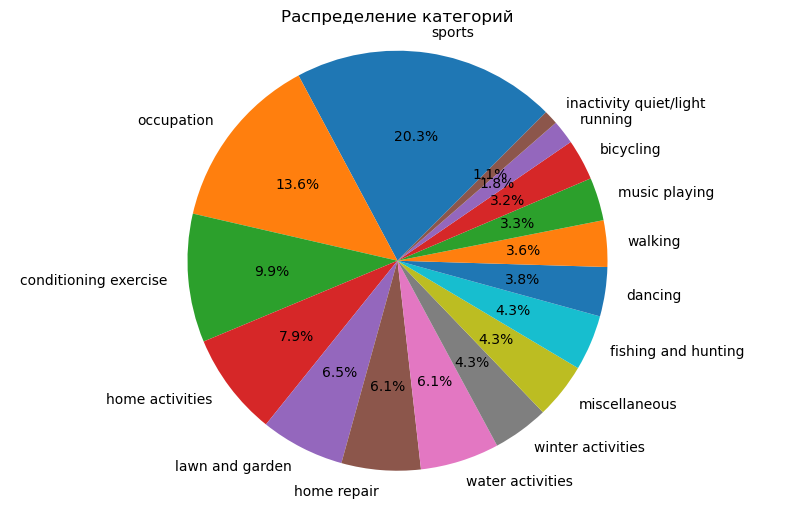

In [36]:
# Создание круговой диаграммы
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Распределение категорий')
plt.axis('equal')  # Чтобы круг был ровным
plt.show()

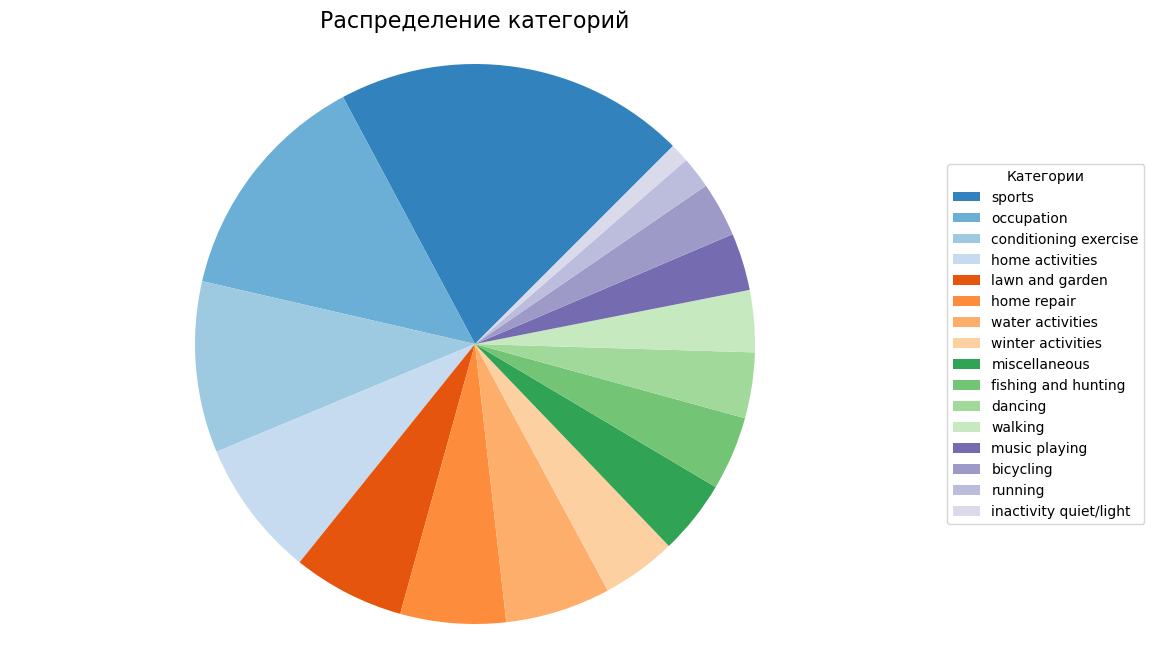

In [48]:
# Построение диаграммы
plt.figure(figsize=(12, 8))
colors = plt.cm.tab20c.colors  # Красочная палитра

# Круговая диаграмма
wedges, texts = plt.pie(
    df['count'], 
    labels=None,  # Убираем метки
    startangle=45, 
    colors=colors
)

# Добавление легенды
plt.legend(
    wedges, 
    df.index, 
    title="Категории",
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Делаем круг ровным
plt.axis('equal')
plt.title('Распределение категорий', fontsize=16)
plt.show()